## Este Notebook es una parte de mi proyecto final del Master en Big Data Analytics que cursé en CEUPE, Centro Europeo de Postgrado. El objetivo era hacer un análisis de sentimientos (positivo,negativo,neutro) de un conjunto Real de artículos económicos de medios online de España , desde el 2011 hasta el 2020. La idea era aplicar Machine o Deep Learning al problema, pero me encontré con la dificultad de hallar algún corpus etiquetado para el contexto económico en español que sirviera como  conjunto de entrenamiento, que es lo que requieren este tipo de poderosas técnicas. 
## Naturalmente, el dataset no contenía entradas  etiquetadas. El usar otros corpus en español, de otros ámbitos diferentes al económico, no da buenos resultados debido al cambio de semántica. Una palabra que tiene una determinada connotación en un ámbito, puede tener otra distinta en el ámbito económico.  Otra opción era usar traducción automática al inglés para luego usar algún corpus en inglés. La investigación y experimentación me hicieron abandonar este enfoque también, debido al mismo problema de semántica pero agudizado por el cambio de idioma.
## Finalmente, tras investigar me encontré con un artículo del banco de España del año 2020, en donde se describe la elaboración de un léxico, esto es, un diccionario elaborado por expertos con términos usados en el área económica/financiera en español, clasificados en neutros, positivos o negativos. La utilización y aplicación de este diccionario en nuestro problema dio un score del 65%, lo que es bastante adecuado en un problema de procesamiento del lenguaje natural.
## Una idea para ampliar esto sería utilizar el etiquetamiento por Diccionario para la elaboración de un corpus en el área económica en español y posteriormente la utilización de este corpus en algoritmos de Machine o Deep Learning para el mejoramiento del desempeño.




## Exportación de Datos

In [ ]:
import pandas as pd
import nltk
import matplotlib as plt
nltk.download('punkt')   # Librería de símbolos de puntuación
from nltk import word_tokenize  # Para tokenizar en palabras
from nltk.corpus import stopwords  # lista de Stopwords
%matplotlib inline


In [2]:
df=pd.read_excel('opendata_news_articles.xlsx')

## Exploración Inicial

In [3]:
df['url'][14569]

'https://elpais.com/elcomidista/2020/10/23/articulo/1603452728_576331.html'

**Esta pagina web  no corresponde. Es sobre gastronomía.**

In [4]:
df['base_url'][14569]

'https://cincodias.elpais.com/tag/ibex_35/'

In [5]:
df['text'][14569]

'El popular bocadillo de ternera tiene un primo hermano en Valencia, que se rellena de un pisto marinero y se deja comer a cualquier hora del día. Explicamos sus orígenes, dónde encontrarlo y cómo hacerlo en casa.\n\nSi hay un bocadillo con nombre propio, se trata del Pepito; que podría haberse llamado Juanito o Menganito, pero ya no sería tan castizo. Un habitual de los bares de España, donde se prepara con carne de ternera, a veces acompañada de ajo, cebolla o pimiento. El origen del nombre se atribuye al cliente de un bar, Don Pepito -duda razonable si también es el de la canción-, que solía pedir un filete entre panes en los años de la posguerra. Desde entonces, se ha vuelto tan popular en las barras que se habla de pepitos de lomo o de pollo, e incluso los hay dulces. Tienen éxito hasta en Sudamérica, especialmente en Venezuela, donde suelen mezclar las distintas carnes con salsas. Pero hoy venimos a hablar del primo hermano de Valencia, con algo menos de chicha y un poco más de p

In [6]:
df.head(5)


,url,base_url,authors,title,summary,text,publish_date,top_image_url,keywords,insert_date
0,https://www.expansion.com/mercados/cronica-bol...,https://www.expansion.com/mercados/cronica-bol...,"Vega Alonso, D.B., M. C.",El Ibex se aleja de los 6.700 puntos tras cuat...,"El selectivo español, a la cola de Europa, se ...",Marcador del Ibex 35 en la Bolsa de Madrid. Ve...,2020-09-22 00:00:00.000000,https://e00-expansion.uecdn.es/assets/multimed...,"aleja, recortes, ibex, puntos, tras, sesiones,...",2020-10-06 07:00:00.000000
1,https://www.expansion.com/mercados/cronica-bol...,https://www.expansion.com/mercados/cronica-bol...,"A.S.S., M. C.","El Ibex pierde un 4,3% en su cuarta semana de ...","En otra sesión marcada por la volatilidad, el ...",Interior de la Bolsa de Madrid Europa Press\n\...,2020-09-25 00:00:00.000000,https://e00-expansion.uecdn.es/assets/multimed...,"ibex, mínimos, mayo, semana, pierde",2020-10-06 07:00:00.000000
2,https://www.expansion.com/mercados/cronica-bol...,https://www.expansion.com/mercados/cronica-bol...,"A.S.S., M. C.","El Ibex rompe la racha bajista, pero no puede ...","El selectivo español ha sumado un mínimo 0,08%...",Interior de la Bolsa de Madrid EFE\n\nLas Bols...,2020-09-23 00:00:00.000000,https://e00-expansion.uecdn.es/assets/multimed...,"racha, ibex, banca, lastrado, rompe, puede",2020-10-06 07:00:00.000000
3,https://www.expansion.com/mercados/cronica-bol...,https://www.expansion.com/mercados/cronica-bol...,"A.S.S., M. C.","El Ibex cierra con recortes, pero sin alejarse...",La agenda de reuniones de los bancos centrales...,Interior de la Bolsa de Madrid Europa Press\n\...,2020-09-17 00:00:00.000000,https://e00-expansion.uecdn.es/assets/multimed...,"recortes, ibex, cierra, puntos, alejarse, 7100",2020-10-06 07:00:00.000000
4,https://www.expansion.com/mercados/cronica-bol...,https://www.expansion.com/mercados/cronica-bol...,"Vega Alonso, D.B.",El Ibex se deja los 7.000 puntos con el lastre...,Las presiones bajistas importadas desde Wall S...,Marcador del Ibex 35 en la Bolsa de Madrid. Ve...,2020-09-08 00:00:00.000000,https://e00-expansion.uecdn.es/assets/multimed...,"street, puntos, lastre, wall",2020-10-06 07:00:00.000000


In [7]:
df.shape

(14570, 10)

In [8]:
df.dtypes

url              object
base_url         object
authors          object
title            object
summary          object
text             object
publish_date     object
top_image_url    object
keywords         object
insert_date      object
dtype: object

**Son 14570 artículos de noticias económicas de España, en su mayoría. Se observa que hay noticias que corresponden con
otro ámbitos del diario el país,tanto dentro como fuera de España. Esto se debe a un error en el proceso de web scrapping que incluyó dentro de la búsqueda el string 'el pais' contenido en la página web de cinco dias.**

In [9]:
df1=df[df.url.str.contains('https://elpais.com')]

In [10]:
df1.shape

(3193, 10)

In [11]:
df1.head()


,url,base_url,authors,title,summary,text,publish_date,top_image_url,keywords,insert_date
247,https://elpais.com/espana/catalunya/2020-10-05...,https://cincodias.elpais.com/tag/ibex_35/,"Pere Ríos, Massimiliano Minocri",Sánchez acudirá con el Rey a Barcelona tras la...,El Rey no viajaba a Barcelona desde noviembre ...,"El rey Felipe VI y el presidente del Gobierno,...",2020-10-05 00:00:00.000000,https://imagenes.elpais.com/resizer/5wuz3Uwxav...,"poder, felipe, inasistencia, sánchez, vi, tras...",2020-10-06 07:00:00.000000
264,https://elpais.com/elpais/2020/09/28/eps/16013...,https://cincodias.elpais.com/tag/ibex_35/,"Richard Ford, Ron Haviv, Ed Kashi, Peter Van A...","Indignación, frustración y miedo",También votaremos para averiguar qué tipo de p...,"Como escritor, dudo que mi manera de ver el mu...",2020-09-28 00:00:00.000000,https://ep00.epimg.net/elpais/imagenes/2020/09...,"frustración, miedo, indignación",2020-10-06 07:00:00.000000
266,https://elpais.com/sociedad/2020/03/30/actuali...,https://cincodias.elpais.com/tag/ibex_35/,"Yolanda Clemente, Daniele Grasso, Patricia R. ...",Casos confirmados de coronavirus en España y e...,"En Europa, los nuevos casos semanales ya super...",Nota a los lectores: EL PAÍS ofrece en abierto...,2020-03-30 00:00:00.000000,https://ep00.epimg.net/sociedad/imagenes/2020/...,"casos, confirmados, coronavirus, pandemia, esp...",2020-10-06 07:00:00.000000
276,https://elpais.com/gente/2020-10-05/guillermo-...,https://cincodias.elpais.com/tag/ibex_35/,"María Porcel, Max Mumby Indigo","Guillermo y Enrique de Inglaterra, dos hermano...",Con tales palabras describe la prensa británic...,“Un análisis forense”. Es decir: la disección ...,2020-10-05 00:00:00.000000,https://imagenes.elpais.com/resizer/Ujh3FU9Bqt...,"enfrentados, enrique, rota, hermanos, monarquí...",2020-10-06 07:00:00.000000
280,https://elpais.com/economia/2020-10-05/una-de-...,https://cincodias.elpais.com/tag/ibex_35/,"Carmen Sánchez-Silva, Justin Lane",Una de cada cuatro mujeres estadounidenses pla...,"Máxime en el caso de las mujeres, que tienen m...",El porcentaje de mujeres directivas en Estados...,2020-10-05 00:00:00.000000,https://imagenes.elpais.com/resizer/6KdKwihOHR...,"efectos, planea, estadounidenses, mujeres, cuatro",2020-10-06 07:00:00.000000


**eliminaremos estas noticias misceláneas del diario El País.**

In [12]:
df.drop(df1.index,inplace=True)

In [13]:
df.shape

(11377, 10)

In [14]:
df['url'].value_counts()

https://cincodias.elpais.com/cincodias/2020/10/13/fondos_y_planes/1602580469_762629.html                       1
https://cincodias.elpais.com/cincodias/2020/10/21/economia/1603264669_708489.html                              1
https://cincodias.elpais.com/cincodias/2020/10/21/companias/1603307302_442957.html                             1
http://cincodias.elpais.com/cincodias/2020/10/19/companias/1603121315_331871.html                              1
https://noticiasdebolsa.es/los-sectoriales-bancarios-van-por-delante/                                          1
                                                                                                              ..
https://www.expansion.com/latinoamerica/iberoamericana-empresarial/2020/10/12/5f833587468aebba078b45b0.html    1
https://www.hosteltur.com/139635_canarias-un-destino-refugio-para-turoperadores-de-cara-al-invierno.html       1
https://formacion.estrategiasdeinversion.com/cursos/curso-de-especulacion-de-jose-luis-cava/    

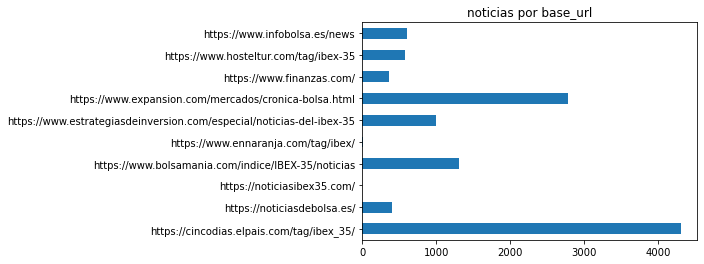

In [15]:
df['base_url'].value_counts().sort_index().plot(kind='barh',title='noticias por base_url')

**Los artículos noticiosos provienen principalmente de los medios digitales  Cincodias y Expansión.**

**Eliminaremos algunas columnas que consideramos menos útiles..**

In [16]:
df.drop(['url','authors','top_image_url','keywords','insert_date'],axis=1,inplace=True)

In [17]:
df.head()

,base_url,title,summary,text,publish_date
0,https://www.expansion.com/mercados/cronica-bol...,El Ibex se aleja de los 6.700 puntos tras cuat...,"El selectivo español, a la cola de Europa, se ...",Marcador del Ibex 35 en la Bolsa de Madrid. Ve...,2020-09-22 00:00:00.000000
1,https://www.expansion.com/mercados/cronica-bol...,"El Ibex pierde un 4,3% en su cuarta semana de ...","En otra sesión marcada por la volatilidad, el ...",Interior de la Bolsa de Madrid Europa Press\n\...,2020-09-25 00:00:00.000000
2,https://www.expansion.com/mercados/cronica-bol...,"El Ibex rompe la racha bajista, pero no puede ...","El selectivo español ha sumado un mínimo 0,08%...",Interior de la Bolsa de Madrid EFE\n\nLas Bols...,2020-09-23 00:00:00.000000
3,https://www.expansion.com/mercados/cronica-bol...,"El Ibex cierra con recortes, pero sin alejarse...",La agenda de reuniones de los bancos centrales...,Interior de la Bolsa de Madrid Europa Press\n\...,2020-09-17 00:00:00.000000
4,https://www.expansion.com/mercados/cronica-bol...,El Ibex se deja los 7.000 puntos con el lastre...,Las presiones bajistas importadas desde Wall S...,Marcador del Ibex 35 en la Bolsa de Madrid. Ve...,2020-09-08 00:00:00.000000


In [18]:
df.dtypes

base_url        object
title           object
summary         object
text            object
publish_date    object
dtype: object

**Extraeremos las filas nulas del campo text, que es la columna en donde se encuentran los artículos a analizar.**

In [19]:
df.text.isnull().sum()

191

In [20]:
df1=df[df.text.isnull()]

In [21]:
df1.shape

(191, 5)

In [22]:
df.drop(df1.index,inplace=True)

In [23]:
df.shape

(11186, 5)

**Hagamos un wordcloud de los primeros cuatro artículos**

In [24]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [25]:
from nltk.corpus import stopwords

In [26]:
stops = stopwords.words('spanish')

In [27]:
wordcloud= WordCloud(colormap='prism',background_color='white',stopwords=stops,max_words=2000)

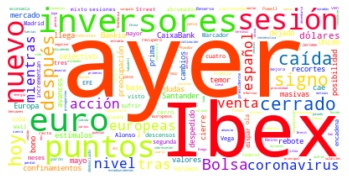

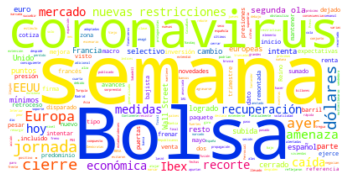

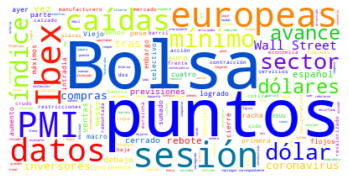

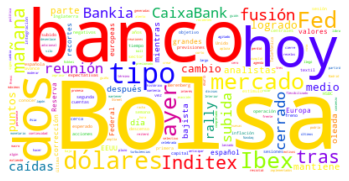

In [28]:
for i in range(4):
    text=df['text'][i]
    wordcloud = wordcloud.generate(text)
    fig = plt.figure()
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.show()
    

 **Se observa en estas noticias el interés por la situación de la bolsa, en particular por el IBEX, que es el principal 
 marcador de la bolsa española. También la preocupación por el incipiente Coronavirus.**

In [29]:
df.isnull().sum()

base_url           0
title              0
summary          402
text               0
publish_date    3795
dtype: int64

**Dado que la fecha de publicación del artículo noticioso va a ser importante en el análisis,eliminaremos registros 
sin fecha de publicación.**

In [30]:
df1=df[df.publish_date.isnull()]

In [31]:
df1.shape

(3795, 5)

In [32]:
df.drop(df1.index,inplace=True)

In [33]:
df.shape

(7391, 5)

In [34]:
df.isnull().sum()

base_url         0
title            0
summary         47
text             0
publish_date     0
dtype: int64

## etiquetamos manualmente 20 artículos para posterior análisis de resultados.

In [35]:
df_manual=pd.read_csv('et_manual.txt')

In [36]:
df_manual

,indice,etiqueta
0,0,negativo
1,25,negativo
2,50,neutro
3,100,neutro
4,250,neutro
5,350,positivo
6,400,positivo
7,500,positivo
8,550,neutro
9,600,positivo


In [37]:
df_manual.set_index('indice',inplace=True)

In [38]:
df_manual

,etiqueta
indice,
0,negativo
25,negativo
50,neutro
100,neutro
250,neutro
350,positivo
400,positivo
500,positivo
550,neutro


## transformamos la fecha a datetime object en python, para que otras funciones la consideren como fechas en vez de sólo caracteres.


In [39]:
df['publish_date']=pd.to_datetime(df['publish_date'])

In [40]:
df.head(5)

,base_url,title,summary,text,publish_date
0,https://www.expansion.com/mercados/cronica-bol...,El Ibex se aleja de los 6.700 puntos tras cuat...,"El selectivo español, a la cola de Europa, se ...",Marcador del Ibex 35 en la Bolsa de Madrid. Ve...,2020-09-22
1,https://www.expansion.com/mercados/cronica-bol...,"El Ibex pierde un 4,3% en su cuarta semana de ...","En otra sesión marcada por la volatilidad, el ...",Interior de la Bolsa de Madrid Europa Press\n\...,2020-09-25
2,https://www.expansion.com/mercados/cronica-bol...,"El Ibex rompe la racha bajista, pero no puede ...","El selectivo español ha sumado un mínimo 0,08%...",Interior de la Bolsa de Madrid EFE\n\nLas Bols...,2020-09-23
3,https://www.expansion.com/mercados/cronica-bol...,"El Ibex cierra con recortes, pero sin alejarse...",La agenda de reuniones de los bancos centrales...,Interior de la Bolsa de Madrid Europa Press\n\...,2020-09-17
4,https://www.expansion.com/mercados/cronica-bol...,El Ibex se deja los 7.000 puntos con el lastre...,Las presiones bajistas importadas desde Wall S...,Marcador del Ibex 35 en la Bolsa de Madrid. Ve...,2020-09-08


In [41]:
df['publish_date'][0]

Timestamp('2020-09-22 00:00:00')

## PREPROCESAMIENTO

### Transformación a minúscula

In [42]:
textlower=[]
for t in df['text']:
    t=t.lower()
    textlower.append(t)
df['text']=textlower    
        
        
       
    
    
    

In [43]:
df['text'][0]

'marcador del ibex 35 en la bolsa de madrid. vega alonso efe\n\nlas bolsas europeas han cerrado con signo dispar tras las ventas masivas de ayer. el ibex, que cerró en mínimos desde mayo después de sufrir la mayor caída en más de tres meses, ha visto como se incrementan los descensos ante el temor a la segunda ola del coronavirus. el selectivo español, a la cola de europa, se ha dejado otro 0,65% hasta los 6.648,60 puntos y encadena ya cuatro sesiones de recortes.\n\nlas bolsas europeas han cerrado con signo mixto con los inversores abrumados por las dudas. ayer, wall street se recuperó en la recta final de la sesión, pero la mejora no tiene hoy continuidad pese a que el presidente de la reserva federal, jerome powell, apuntara a nuevos estímulos. el temor a un nuevo parón en la economía por los rebrotes del coronavirus pesa demasiado sobre los inversores europeos, que ven con preocupación la posibilidad de nuevos confinamientos en reino unido, francia y españa.\n\nla expansión del cor

### remover puntuación

In [45]:
import string
punct =[]
punct += list(string.punctuation)
punct += '’'
punct.remove("'")
def remove_punctuations(text):
    for punctuation in punct:
        text = text.replace(punctuation, ' ')
    return text

In [46]:
df['text'] = df['text'].apply(remove_punctuations)

In [47]:
df['text'][0]


'marcador del ibex 35 en la bolsa de madrid  vega alonso efe\n\nlas bolsas europeas han cerrado con signo dispar tras las ventas masivas de ayer  el ibex  que cerró en mínimos desde mayo después de sufrir la mayor caída en más de tres meses  ha visto como se incrementan los descensos ante el temor a la segunda ola del coronavirus  el selectivo español  a la cola de europa  se ha dejado otro 0 65  hasta los 6 648 60 puntos y encadena ya cuatro sesiones de recortes \n\nlas bolsas europeas han cerrado con signo mixto con los inversores abrumados por las dudas  ayer  wall street se recuperó en la recta final de la sesión  pero la mejora no tiene hoy continuidad pese a que el presidente de la reserva federal  jerome powell  apuntara a nuevos estímulos  el temor a un nuevo parón en la economía por los rebrotes del coronavirus pesa demasiado sobre los inversores europeos  que ven con preocupación la posibilidad de nuevos confinamientos en reino unido  francia y españa \n\nla expansión del cor

### Eliminación símbolos de espacio en blanco : \n

In [48]:
df['text']=df['text'].apply(lambda x: x.replace('\n', ' '))

In [49]:
df['text'][0]

'marcador del ibex 35 en la bolsa de madrid  vega alonso efe  las bolsas europeas han cerrado con signo dispar tras las ventas masivas de ayer  el ibex  que cerró en mínimos desde mayo después de sufrir la mayor caída en más de tres meses  ha visto como se incrementan los descensos ante el temor a la segunda ola del coronavirus  el selectivo español  a la cola de europa  se ha dejado otro 0 65  hasta los 6 648 60 puntos y encadena ya cuatro sesiones de recortes   las bolsas europeas han cerrado con signo mixto con los inversores abrumados por las dudas  ayer  wall street se recuperó en la recta final de la sesión  pero la mejora no tiene hoy continuidad pese a que el presidente de la reserva federal  jerome powell  apuntara a nuevos estímulos  el temor a un nuevo parón en la economía por los rebrotes del coronavirus pesa demasiado sobre los inversores europeos  que ven con preocupación la posibilidad de nuevos confinamientos en reino unido  francia y españa   la expansión del coronavir

## Estemización y Lematización

### Stemización( Consiste en reducir la inflexión en las palabras a sus formas raíces.).  En este caso no aplicaremos esta operación, pues el diccionario considera variaciones de las palabras en el contexto financiero.
### Lo mismo ocurre con la Lematización. El diccionario considera variaciones de palabras según contexto.
     

## Tokenización

In [52]:
df['tokens'] = df['text'].apply(word_tokenize)

In [53]:
df.head()

,base_url,title,summary,text,publish_date,tokens
0,https://www.expansion.com/mercados/cronica-bol...,El Ibex se aleja de los 6.700 puntos tras cuat...,"El selectivo español, a la cola de Europa, se ...",marcador del ibex 35 en la bolsa de madrid ve...,2020-09-22,"[marcador, del, ibex, 35, en, la, bolsa, de, m..."
1,https://www.expansion.com/mercados/cronica-bol...,"El Ibex pierde un 4,3% en su cuarta semana de ...","En otra sesión marcada por la volatilidad, el ...",interior de la bolsa de madrid europa press l...,2020-09-25,"[interior, de, la, bolsa, de, madrid, europa, ..."
2,https://www.expansion.com/mercados/cronica-bol...,"El Ibex rompe la racha bajista, pero no puede ...","El selectivo español ha sumado un mínimo 0,08%...",interior de la bolsa de madrid efe las bolsas...,2020-09-23,"[interior, de, la, bolsa, de, madrid, efe, las..."
3,https://www.expansion.com/mercados/cronica-bol...,"El Ibex cierra con recortes, pero sin alejarse...",La agenda de reuniones de los bancos centrales...,interior de la bolsa de madrid europa press l...,2020-09-17,"[interior, de, la, bolsa, de, madrid, europa, ..."
4,https://www.expansion.com/mercados/cronica-bol...,El Ibex se deja los 7.000 puntos con el lastre...,Las presiones bajistas importadas desde Wall S...,marcador del ibex 35 en la bolsa de madrid ve...,2020-09-08,"[marcador, del, ibex, 35, en, la, bolsa, de, m..."


### Eliminación de Stopwords (palabras sin significado)

In [54]:
df['tokens'] = df['tokens'].apply(lambda text_list: [x for x in text_list if x not in stops])

In [55]:
#df['tokens'][0]

### Remueve números

In [56]:
df['tokens'] = df['tokens'].apply(lambda list_data: [x for x in list_data if x.isalpha()])

In [57]:
#df['tokens'][0]

## Análisis de sentimiento con Diccionario

In [58]:
dicpos=pd.read_csv('palabras positivas.txt')

In [59]:
dicneg=pd.read_csv('palabras negativas.txt')

In [60]:
dicpos.shape, dicneg.shape

((188, 1), (376, 1))

**El diccionario cuenta con 188 palabras positivas y 376 palabras negativas.**

In [61]:
pos_list=set(dicpos.POSITIVAS)

In [62]:
neg_list=set(dicneg.NEGATIVAS)

### definición función de sentimiento y cálculo  de sentimiento en textos

In [63]:
def sentiment(tokens):
    sent=0
    for token in tokens:
        if token in pos_list:
            sent +=1
        elif token in neg_list:
            sent -=1
    return sent        


In [64]:
df['sent']=df['tokens'].apply(sentiment)

In [65]:
df

,base_url,title,summary,text,publish_date,tokens,sent
0,https://www.expansion.com/mercados/cronica-bol...,El Ibex se aleja de los 6.700 puntos tras cuat...,"El selectivo español, a la cola de Europa, se ...",marcador del ibex 35 en la bolsa de madrid ve...,2020-09-22,"[marcador, ibex, bolsa, madrid, vega, alonso, ...",-6
1,https://www.expansion.com/mercados/cronica-bol...,"El Ibex pierde un 4,3% en su cuarta semana de ...","En otra sesión marcada por la volatilidad, el ...",interior de la bolsa de madrid europa press l...,2020-09-25,"[interior, bolsa, madrid, europa, press, bolsa...",-5
2,https://www.expansion.com/mercados/cronica-bol...,"El Ibex rompe la racha bajista, pero no puede ...","El selectivo español ha sumado un mínimo 0,08%...",interior de la bolsa de madrid efe las bolsas...,2020-09-23,"[interior, bolsa, madrid, efe, bolsas, europea...",-3
3,https://www.expansion.com/mercados/cronica-bol...,"El Ibex cierra con recortes, pero sin alejarse...",La agenda de reuniones de los bancos centrales...,interior de la bolsa de madrid europa press l...,2020-09-17,"[interior, bolsa, madrid, europa, press, caída...",-4
4,https://www.expansion.com/mercados/cronica-bol...,El Ibex se deja los 7.000 puntos con el lastre...,Las presiones bajistas importadas desde Wall S...,marcador del ibex 35 en la bolsa de madrid ve...,2020-09-08,"[marcador, ibex, bolsa, madrid, vega, alonso, ...",-7
...,...,...,...,...,...,...,...
14560,https://cincodias.elpais.com/tag/ibex_35/,Amancio Ortega ingresará mañana 650 millones p...,"El fundador y primer accionista de Inditex, Am...",el fundador y primer accionista de inditex am...,2020-11-01,"[fundador, primer, accionista, inditex, amanci...",2
14561,https://cincodias.elpais.com/tag/ibex_35/,Luis Miguel Gilpérez: “Las 'startups' de hoy s...,Acaba de publicar España 5.0 (Editorial Versus...,ingeniero industrial luis miguel gilpérez ma...,2020-10-30,"[ingeniero, industrial, luis, miguel, gilpérez...",2
14565,https://cincodias.elpais.com/tag/ibex_35/,Qué se juegan las empresas españolas en las el...,En un contexto en el que la pandemia domina la...,el 3 de noviembre todas las miradas estarán pu...,2020-10-30,"[noviembre, todas, miradas, puestas, unidos, c...",-5
14566,https://cincodias.elpais.com/tag/ibex_35/,Un primer año trepidante para Lagarde al frent...,El primer año de Christine Lagarde en la presi...,el primer año de christine lagarde en la presi...,2020-10-30,"[primer, año, christine, lagarde, presidencia,...",-3


In [66]:
df[df['sent']>0].shape

(1986, 7)

In [67]:
df[df['sent']<0].shape

(3415, 7)

In [68]:
df[df['sent']==0].shape

(1990, 7)

In [69]:
def flag(x):
    if x>0:
        z='positivo'
    elif x==0:
        z='neutro'
    if x<0:
        z='negativo'
    return z

In [70]:
df['flag']=df.sent.apply(lambda x: flag(x))

## Matriz Confusión

In [71]:
indices=[0,25,50,100,250,350,400,500,550,600,1100,7390,7300,7250,6300,4370,7245,7255,7350,7365]

In [72]:
y=df['flag'][indices]

In [73]:
x=df_manual['etiqueta']

In [74]:
from sklearn.metrics import confusion_matrix,classification_report

In [75]:
print(confusion_matrix(x,y))

[[6 2 1]
 [2 3 1]
 [1 0 4]]


In [76]:
print(classification_report(x,y))

              precision    recall  f1-score   support

    negativo       0.67      0.67      0.67         9
      neutro       0.60      0.50      0.55         6
    positivo       0.67      0.80      0.73         5

    accuracy                           0.65        20
   macro avg       0.64      0.66      0.65        20
weighted avg       0.65      0.65      0.65        20



**El método tiene una accuracy de 65% y un f1 elevado, lo que está bien para los problemas de NLP (Natural Language Processing)**

## ordenamos por fecha

In [77]:
df=df.sort_values('publish_date')

In [78]:
df.head(5)

,base_url,title,summary,text,publish_date,tokens,sent,flag
1242,https://www.ennaranja.com/tag/ibex/,Los índices bursátiles muestran el resumen eco...,"Por tanto, es posible conocer la situación eco...",tiempo de lectura 3 minutos es posible que e...,2011-09-25 20:55:45,"[tiempo, lectura, minutos, posible, término, í...",1,positivo
1251,https://www.ennaranja.com/tag/ibex/,La importancia del IBEX para la economía española,La fórmula de cálculo es la siguiente:IBEX 35(...,tiempo de lectura 5 minutos en la mayoría de...,2012-04-11 06:00:56,"[tiempo, lectura, minutos, mayoría, ocasiones,...",-1,negativo
3902,https://cincodias.elpais.com/tag/ibex_35/,“Pocos economistas van de lo concreto a lo de ...,"En la actualidad, imparte la cátedra Shirley a...",paul milgrom ha sido galardonado con el premio...,2013-06-20 00:00:00,"[paul, milgrom, sido, galardonado, premio, bbv...",-7,negativo
4667,https://cincodias.elpais.com/tag/ibex_35/,“Pocos economistas van de lo concreto a lo de ...,"En la actualidad, imparte la cátedra Shirley a...",paul milgrom ha sido galardonado con el premio...,2013-06-20 00:00:00,"[paul, milgrom, sido, galardonado, premio, bbv...",-7,negativo
7405,https://cincodias.elpais.com/tag/ibex_35/,Esto es lo que piensan 21 actrices sobre envej...,Foto: Getty3 de 21Frances McDormand en The New...,foto getty 3 de 21 frances mcdormand en the...,2014-10-23 07:30:43,"[foto, getty, frances, mcdormand, the, new, yo...",-1,negativo


In [79]:
df.tail(5)

,base_url,title,summary,text,publish_date,tokens,sent,flag
12416,https://www.expansion.com/mercados/cronica-bol...,"Inditex, H&M y Gap: impulso online y cierre de...",Inditex cerrará entre 250 y 300 tiendas enEspa...,inditex cerrará entre 250 y 300 tiendas enespa...,2020-11-01 00:00:00,"[inditex, cerrará, tiendas, enespaña, aunque, ...",-3,negativo
11206,https://www.finanzas.com/,El riesgo climático va a la cuenta de resultados,"Nassim Taleb, conocido por la teoría del cisne...",nassim taleb conocido por la teoría del cisne...,2020-11-01 08:00:00,"[nassim, taleb, conocido, teoría, cisne, negro...",0,neutro
13083,https://cincodias.elpais.com/tag/ibex_35/,"Pepita Marín, CEO de We Are Knitters, de empez...",En 2011 ella y Alberto Bravo fundaron este eco...,«lo que he aprendido en estos nueve años es qu...,2020-11-01 18:38:07,"[aprendido, nueve, años, suerte, importante, p...",-1,negativo
12737,https://cincodias.elpais.com/tag/ibex_35/,Por qué el uso de mascarillas transparentes no...,"Desde que las mascarillas se han impuesto, se ...",desde que las mascarillas se han impuesto se ...,2020-11-01 18:38:43,"[mascarillas, impuesto, generado, barrera, vis...",-7,negativo
10810,https://www.expansion.com/mercados/cronica-bol...,¿Qué valores españoles serán los más beneficia...,¿Qué valores españoles serán los más beneficia...,¿qué valores españoles serán los más beneficia...,2020-11-03 00:00:00,"[valores, españoles, beneficiados, resultado, ...",-1,negativo


**Los artículos van desde el 25 de septiembre de 2011 hasta el 3 de noviembre de 2020**

In [80]:
df.set_index('publish_date', inplace=True)

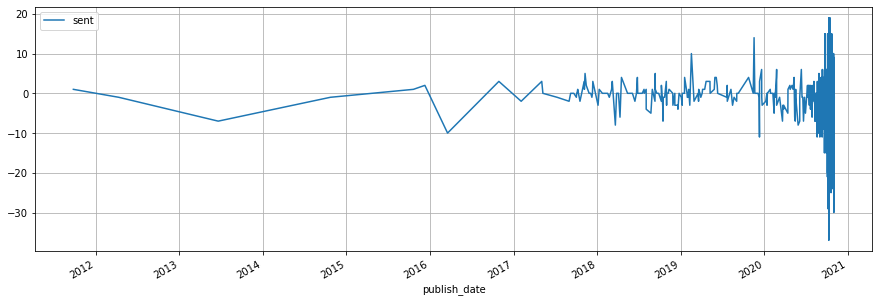

In [81]:
df.plot(grid=True, figsize=(15,5))

**Se observa en el gráfico a partir de la fecha inicial en 2011 hasta la mitad del 2013 un
incremento en el tono negativo de los artículos y una subida posterior sostenida en el tono
hasta casi fines del 2015, pasando al lado positivo aproximadamente en la mitad de este
año, bajando nuevamente hasta el primer tercio del 2016. A partir de aquí hay una subida
hasta octubre o noviembre del 2016.
A partir aproximadamente de octubre del 2017 comienza una volatilidad en el sentimiento
que se ve muy marcada a partir de fines del 2019, que coincide seguramente con la llegada
del Coronavirus a Europa. La volatilidad se hace extrema ya a partir de la mitad del 2020
cayendo el sentimiento negativo hasta niveles de -30. Se observan también alzas positivas
en este período hasta casi +20, que deben corresponder con recuperaciones en algunos
ámbitos que se ven muy positivas en un ambiente preponderantemente negativo**

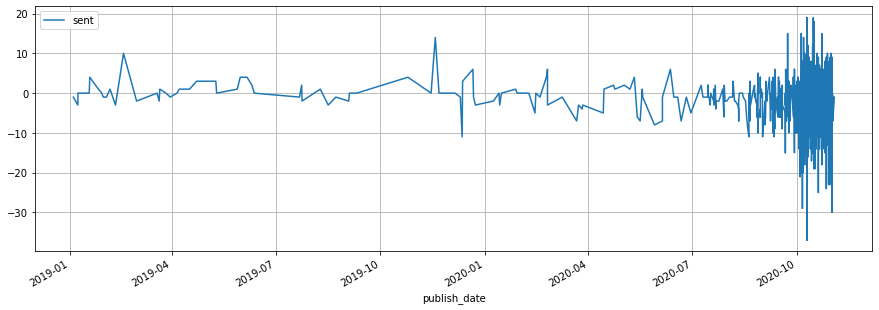

In [82]:
from datetime import datetime
start_date=datetime(2019,1,1)
end_date=datetime(2020,11,3)
df[(df.index>=start_date)&(df.index<=end_date)].plot(grid=True, figsize=(15,5))

**Volatilidad más marcada a partir de aproximadamente septiembre de 2020.**

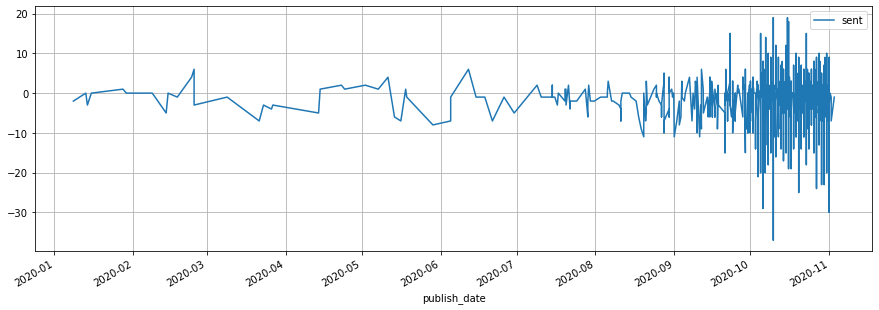

In [83]:
start_date=datetime(2020,1,1)
end_date=datetime(2020,11,3)
df[(df.index>=start_date)&(df.index<=end_date)].plot(grid=True, figsize=(15,5))
plt.savefig('graf2020')

**Se observa volatilidad extrema a partir de octubre de 2020, que con seguridad corresponde
con los inicios de otra ola del Coronavirus. El sentimiento negativo cruza la marca de -30.**

**¿Cuántos artículos positivos,negativos y neutros hay en 2020?**

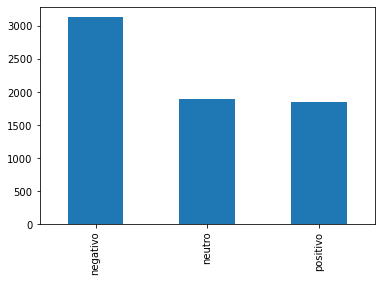

In [84]:
start_date=datetime(2020,10,1)
end_date=datetime(2020,11,3)
df[(df.index>=start_date)&(df.index<=end_date)]['flag'].value_counts().plot(kind='bar')

**Se observa casi un empate entre noticias (artículos) con tono neutro y positivo, dominando
evidentemente el tono negativo en el sentimiento.**

**Hacer un workcloud con artículos más negativos**

In [85]:
condition=df['sent']<-20

In [86]:
df1=df[condition]

In [87]:
df1

,base_url,title,summary,text,tokens,sent,flag
publish_date,,,,,,,
2020-10-04,https://cincodias.elpais.com/tag/ibex_35/,El abismo detrás de los estímulos,El Banco de España y el FMI han pedido que se ...,una persona pasa al lado de una oficina de emp...,"[persona, pasa, lado, oficina, empleo, madrid,...",-21,negativo
2020-10-06,https://cincodias.elpais.com/tag/ibex_35/,La economía de América Latina sufrirá en 2020 ...,"Por subregiones, la mayor caída de la renta po...",la pandemia tendrá efectos devastadores para l...,"[pandemia, efectos, devastadores, economía, la...",-29,negativo
2020-10-10,https://cincodias.elpais.com/tag/ibex_35/,El peligroso salto del ERTE al ERE,Es más probable que acaben en ERE que en reinc...,david garcía aceituno lleva en erte desde marz...,"[david, garcía, aceituno, lleva, erte, marzo, ...",-37,negativo
2020-10-20,https://cincodias.elpais.com/tag/ibex_35/,Hernández de Cos pide facilitar la “salida ord...,Aseguró que la crisis ya está produciendo “dañ...,mensajes cada vez más pesimista del banco de e...,"[mensajes, cada, vez, pesimista, banco, españa...",-25,negativo
2020-10-20,https://cincodias.elpais.com/tag/ibex_35/,Hernández de Cos pide facilitar la “salida ord...,Aseguró que la crisis ya está produciendo “dañ...,mensajes cada vez más pesimista del banco de e...,"[mensajes, cada, vez, pesimista, banco, españa...",-25,negativo
2020-10-27,https://www.expansion.com/mercados/cronica-bol...,"La economía global, en la encrucijada","Además, es muy probable que la incertidumbre e...",la imposición de cada vez más restricciones sa...,"[imposición, cada, vez, restricciones, sanitar...",-24,negativo
2020-10-29,https://cincodias.elpais.com/tag/ibex_35/,13 relatos cortos de terror para disfrutar de ...,Hemos dejado un espacio en blanco (así: “[.......,antes de empezar a leer es obligatorio que po...,"[empezar, leer, obligatorio, pongas, luz, tenu...",-21,negativo
2020-10-29,https://cincodias.elpais.com/tag/ibex_35/,"El Banco de España considera ""crucial"" mantene...",El Banco de España considera que en la situaci...,el banco de españa considera que en la situaci...,"[banco, españa, considera, situación, actual, ...",-23,negativo
2020-10-29,https://cincodias.elpais.com/tag/ibex_35/,"El Banco de España considera ""crucial"" mantene...",El Banco de España considera que en la situaci...,el banco de españa considera que en la situaci...,"[banco, españa, considera, situación, actual, ...",-23,negativo


HACER WORKCLOUD DE ESTOS

In [88]:
def wc(text):
    wordc = wordcloud.generate(text)
    fig=plt.figure()
    plt.imshow(wordc, interpolation='bilinear')
    plt.axis('off')
    plt.show()

In [89]:
df['tokens'] = df['tokens'].apply(lambda text_list: [x for x in text_list if x not in stops])

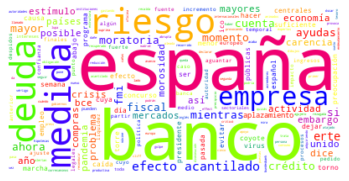

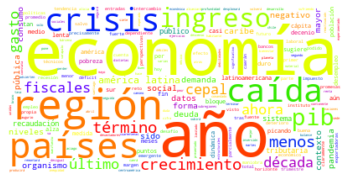

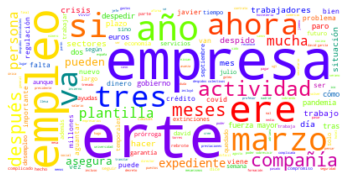

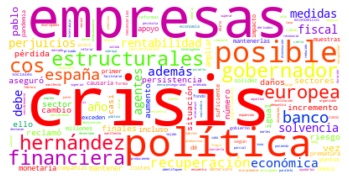

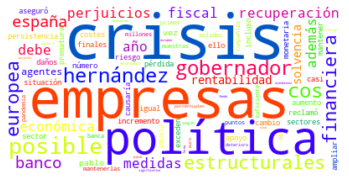

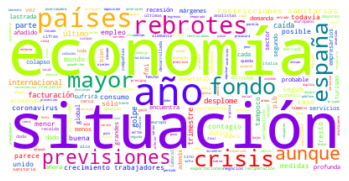

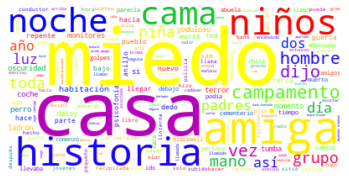

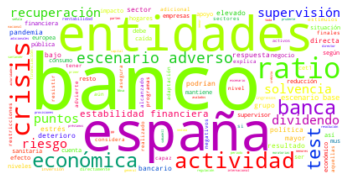

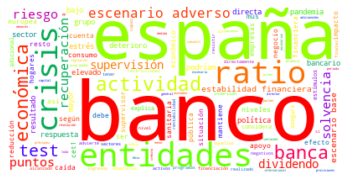

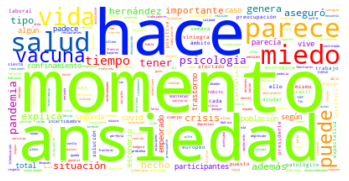

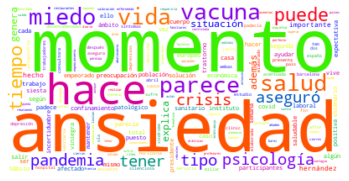

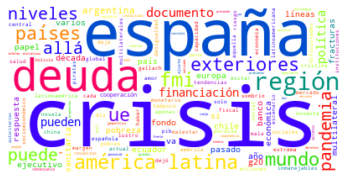

publish_date
2020-10-04    None
2020-10-06    None
2020-10-10    None
2020-10-20    None
2020-10-20    None
2020-10-27    None
2020-10-29    None
2020-10-29    None
2020-10-29    None
2020-10-30    None
2020-10-30    None
2020-11-01    None
Name: text, dtype: object

In [90]:
df1['text'].apply(lambda x: wc(x))

**Observamos que la palabra más repetida es crisis, seguida de España, banco, miedo,
economía, ansiedad,etc. Por otro lado las palabras pandemia o coronavirus no aparecen entre
las principales, debido seguramente a que ya se vive hace casi un año en la situación de
pandemia, así que es un escenario que se da por sentado. Por otro lado sí aparece la
palabra rebrote.**